In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("/kaggle/input/fashion-talk/Dataset.csv")
df.head()

,Age,Rating,Recommended IND,Positive Feedback Count,Talks
0,33,4,1,0,Absolutely wonderful - silky and sexy and comf...
1,34,5,1,4,Love this dress! it's sooo pretty. i happene...
2,60,3,0,0,Some major design flawsI had such high hopes f...
3,50,5,1,0,"My favorite buy!I love, love, love this jumpsu..."
4,47,5,1,6,Flattering shirt This shirt is very flattering...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      23486 non-null  int64 
 1   Rating                   23486 non-null  int64 
 2   Recommended IND          23486 non-null  int64 
 3   Positive Feedback Count  23486 non-null  int64 
 4   Talks                    22642 non-null  object
dtypes: int64(4), object(1)
memory usage: 917.5+ KB


In [9]:
df.describe()

,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000
mean,43.198544,4.196032,0.822362,2.535936
std,12.279544,1.110031,0.382216,5.702202
min,18.000000,1.000000,0.000000,0.000000
25%,34.000000,4.000000,1.000000,0.000000
50%,41.000000,5.000000,1.000000,1.000000
75%,52.000000,5.000000,1.000000,3.000000
max,99.000000,5.000000,1.000000,122.000000


In [4]:
pd.options.display.max_colwidth = None
df['Talks'].sample(1)

23113    Too loose on topI was planning to order it online but someone returned it to my local store and i tried it on.............. my regular size is 6. i have another byron lars dress size 6 that fits me like a glove. this dress fits beautifully from the waist down. the top part is very loose and at least a size too big. very disappointing. i am not sure if it is just me or this particular dress, but it was not flattering. :(
Name: Talks, dtype: object

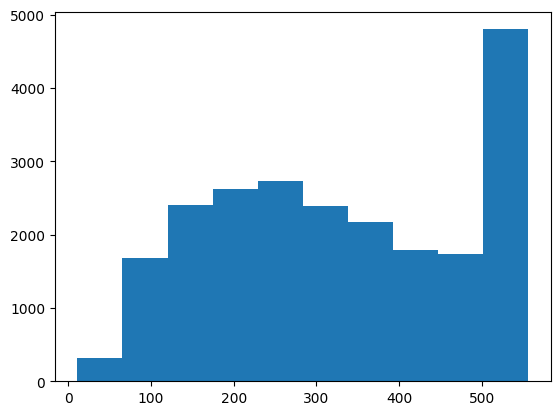

In [7]:
plt.hist(df['Talks'].str.len())
plt.show()

*We found that text would get cut off if the character length exceeded 500.*

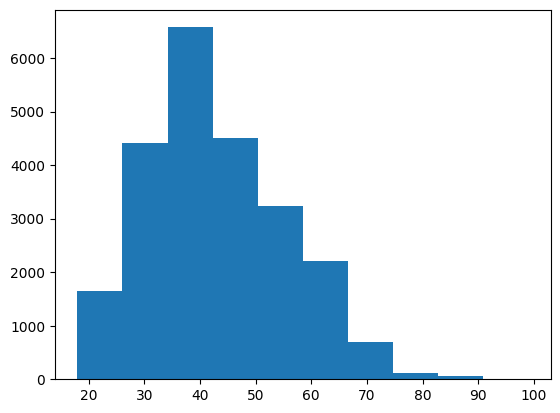

In [11]:
plt.hist(df['Age'])
plt.show()

Since we need to work only for genz filtering the data for the age group of 12 - 27

In [14]:
gen_df=df[(df['Age'] >= 12) & (df['Age'] <= 27)]

In [26]:
gen_df.to_csv('/kaggle/gen_df.csv', index=False)

In [27]:
gen_df.head()

,Age,Rating,Recommended IND,Positive Feedback Count,Talks
8,24,5,1,0,FlatteringI love this dress. i usually get an xs but it runs a little snug in bust so i ordered up a size. very flattering and feminine with the usual retailer flair for style.
32,21,5,1,0,Love these pantsThese pants are even better in person. the only downside is that they need to be dry cleaned.
42,23,5,1,0,"Soft & lovelyThis poncho is so cute i love the plaid check design, the colors look like sorbet & cream and it will pair well with a turtleneck and jeans or pencil skirt and heels. i love this look for fall and it can roll right into spring. great buy!!"
72,27,5,1,4,"Beautiful designI have a short torso and this works well for me. 34c, bought the 0. there's not much stretch to the fabric so it is fitted to my chest, but not in an uncomfortable way. definitely doesn't hang and have extra fabric like on the model. \r\n\r\nzipper goes almost all the way down to the bottom so it's easier to get on and off which makes up for the lack of stretch n the fabric.\r\n\r\nunlike another reviewer, i found it went really well with navy pants and i wore it to a business meeting under a blazer. wi"
89,24,4,1,3,"Pretty, but not for me...I bought this top online in the burnt orange color and was so excited to get it. when i tried it on, the fit was fine but it just lacked...something. the back was a little bit too long, the front was a little bit too short and it lacked the overall tailored look that i was after. gorgeous fabric and top, but not for me. i wanted something more for $150! bought the velvet tunic instead ;)"


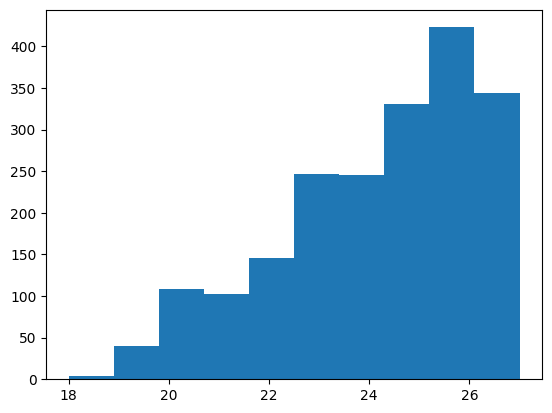

In [28]:
plt.hist(gen_df['Age'])
plt.show()

In [29]:
gen_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1990 entries, 8 to 23476
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1990 non-null   int64 
 1   Rating                   1990 non-null   int64 
 2   Recommended IND          1990 non-null   int64 
 3   Positive Feedback Count  1990 non-null   int64 
 4   Talks                    1930 non-null   object
dtypes: int64(4), object(1)
memory usage: 93.3+ KB


## Data PreProcess

In [41]:
gen_df['Talks'] = gen_df['Talks'].str.strip()
gen_df['Talks'] = gen_df['Talks'].fillna('')

/tmp/ipykernel_278/1306860602.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen_df['Talks'] = gen_df['Talks'].str.strip()
/tmp/ipykernel_278/1306860602.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen_df['Talks'] = gen_df['Talks'].fillna('')


In [42]:
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
words = set(nltk.corpus.brown.words())

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
text = gen_df['Talks'].copy()


In [48]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import words as nltk_words

In [49]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /usr/share/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [50]:
english_words = set(nltk_words.words())

In [64]:
def clean_text(text):
    # Convert to lowercase and remove parentheses
    cleaned_text = text.lower().replace('(','').replace(')','')
    
    # Tokenize the text
    tokenized_text = word_tokenize(cleaned_text)
    
    # Remove stopwords
    filtered_sentence = [w for w in tokenized_text if w not in stopwords.words('english')]
    
    # Remove the last word if it's not in the English words list
    if filtered_sentence and filtered_sentence[-1] not in english_words:
        filtered_sentence = filtered_sentence[:-1]
    
    # Join the filtered sentence back into a string
    return ' '.join(filtered_sentence)

In [53]:
gen_df.loc[:, 'Talks'] = gen_df['Talks'].apply(clean_text)

In [57]:
gen_df.to_csv('/kaggle/working/cleaned_genx_data.csv', index=False)

In [58]:
genx_df=pd.read_csv('/kaggle/working/cleaned_genx_data.csv')

In [59]:
genx_df.head()

,Age,Rating,Recommended IND,Positive Feedback Count,Talks
0,24,5,1,0,flatteringi love dress . usually get xs runs little snug bust ordered size . flattering feminine usual retailer flair style
1,21,5,1,0,love pantsthese pants even better person . downside need dry
2,23,5,1,0,"soft & lovelythis poncho cute love plaid check design , colors look like sorbet & cream pair well turtleneck jeans pencil skirt heels . love look fall roll right spring . great buy"
3,27,5,1,4,"beautiful designi short torso works well . 34c , bought 0 . 's much stretch fabric fitted chest , uncomfortable way . definitely n't hang extra fabric like model . zipper goes almost way bottom 's easier get makes lack stretch n fabric . unlike another reviewer , found went really well navy pants wore business meeting blazer . wi"
4,24,4,1,3,"pretty , ... bought top online burnt orange color excited get . tried , fit fine lacked ... something . back little bit long , front little bit short lacked overall tailored look . gorgeous fabric top , . wanted something $ 150 ! bought velvet tunic instead"


In [60]:
genx_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1990 entries, 0 to 1989
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1990 non-null   int64 
 1   Rating                   1990 non-null   int64 
 2   Recommended IND          1990 non-null   int64 
 3   Positive Feedback Count  1990 non-null   int64 
 4   Talks                    1930 non-null   object
dtypes: int64(4), object(1)
memory usage: 77.9+ KB
